### Principal component analysis

 #### Creating data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x=np.array([[1,3,5,7,9,13,20,20,21,24,26],[5,7,11,14,15,17,18,19,21,22,26]])
print(x)

[[ 1  3  5  7  9 13 20 20 21 24 26]
 [ 5  7 11 14 15 17 18 19 21 22 26]]


In [9]:
x=x.T
print(x)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


The goal is to reduce this data set into 1 dimentional data set

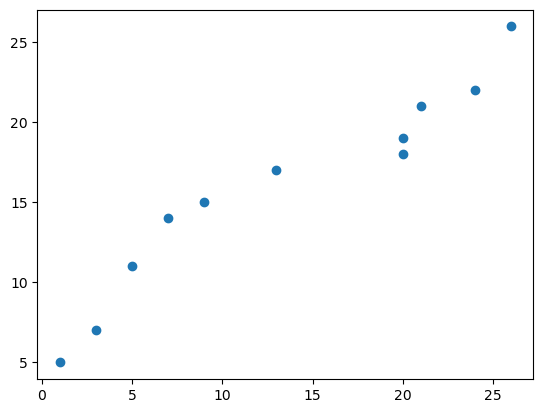

In [10]:
plt.scatter(x[:,0],x[:,1])

normalise the data by shifting the mean to zero

In [11]:
x_meaned=x-np.mean(x, axis=0)
print(x_meaned)

[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


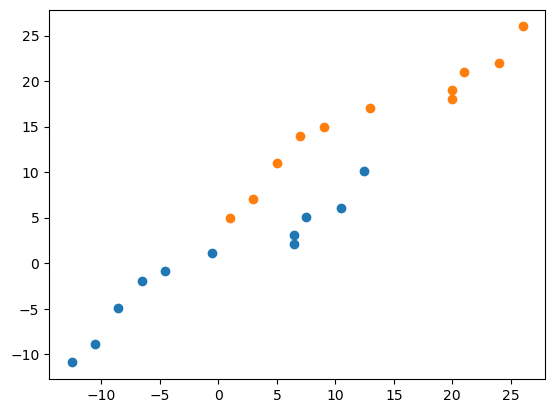

In [12]:
plt.figure
plt.scatter(x_meaned[:,0],x_meaned[:,1])
plt.scatter(x[:,0],x[:,1])

In [13]:
c=np.cov(x_meaned, rowvar=False)
print(c)

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


In [14]:
evalue, evec = np.linalg.eig(c)
print(evalue)

[119.29375452   2.26988184]


In [15]:
print(evec)

[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [16]:
sorted_index=np.argsort(evalue)[::-1]
sorted_eval=evalue[sorted_index]
print(sorted_eval)

[119.29375452   2.26988184]


In [17]:
sorted_evec = evec[:,sorted_index]
print(sorted_evec)

[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [18]:
# Now I want to have a 1 D representation of the data
n=1
evec_subset=sorted_evec[:,:n]
print(evec_subset)

[[0.81956216]
 [0.57299028]]


In [19]:
# Transform data in the direction of the eigenvector
x_reduced = np.dot(evec_subset.T, x_meaned.T).T
print(x_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


In [20]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
# We can use a direct method as well using sklearn
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
x_reduced=pca.fit_transform(x)
print(x_reduced)

[[ 16.53258291]
 [ 13.74747803]
 [  9.81639259]
 [  6.45829743]
 [  4.24618282]
 [ -0.17804639]
 [ -6.48797183]
 [ -7.0609621 ]
 [ -9.02650482]
 [-12.05818159]
 [-15.98926703]]


#### Let's do PCA on a real data set of R.A Fisher's Iris dataset
Data set will be of size 150x4 so co-variance matrix will be of size 4x4
There will be 4 eigen values and 4 eigen vevctors
Objective: To reduce the data to have only two dimentions. so we need to find y1 and y2 that are linear combination of original features.
y1=alpha1X1 + alpha2X2 + alpha3X3 + alpha4X4
y2=beta1X2 + beta2X2 + beta3X3 + beta4X4

alpha1,alpha2, alpha3, alpha4 will be principal eigen vectors i.e eigen ventors corresponding to the covariance matrix
and beta1,.....beta4 will be eigen vectors corresponding to the scond largest eigen value.

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)
print(iris.get('feature_names'))

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
pca = PCA(n_components=2)
pca.fit(iris.data)
x_reduced = pca.fit_transform(iris.data)
print(x_reduced.data)

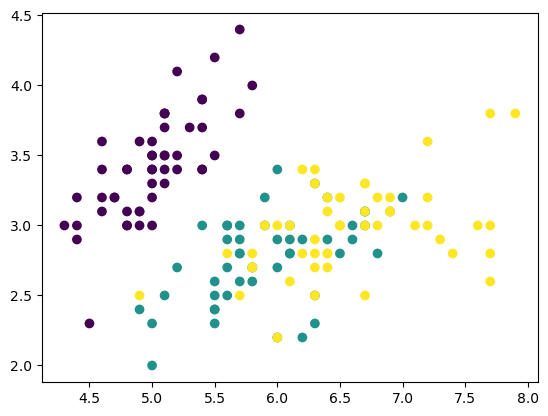

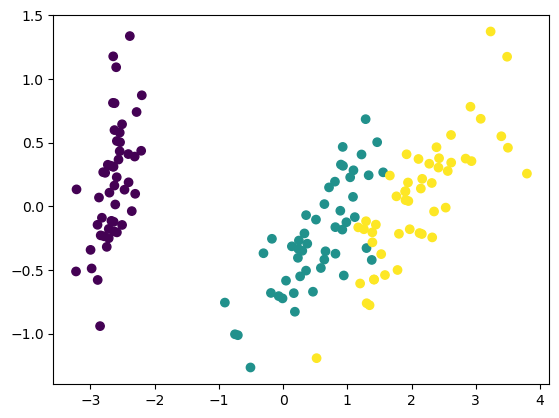

In [34]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[:, 0],iris.data[:,1], c=iris.target)
plt.show()

plt.scatter(x_reduced[:, 0],x_reduced[:,1], c=iris.target)

(178, 13)


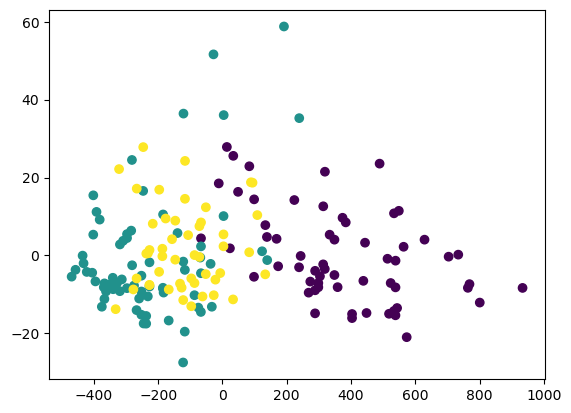

In [36]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
wine = load_wine()
print(wine.data.shape)

pca = PCA(n_components=2)
pca.fit(wine.data)
wine_reduced = pca.fit_transform(wine.data)
print(wine_reduced.data)

plt.scatter(wine_reduced[:, 0],wine_reduced[:,1], c=wine.target)